## Section 2. Plots for tracking results

### Generating tracking results

We compute the matching based on matching scores.
We move the step to here to unify all kinds of output from three different approaches (ours, tobac, PyFLEXTRKR)

In [1]:
# dates = ["20230801", "20230802", "20230803", "20230804", "20230805", "20230806", "20230807",
#          "20230808", "20230809", "20230810", "20230811", "20230812", "20230813", "20230814",]
# dates = ["20230801"]
dates = ["20230801", "20230802", "20230803", "20230804", "20230805", "20230806" , "20230807", "20230808"]

In [2]:
import pickle
from os.path import join as pjoin
import os

techniques = [("pFGW-system", 0.1), ("pFGW-system", 0.2), ("pFGW-system", 0.3)]
track_information = {}
dataset_strs = {}
alpha=0.4
nDates = len(dates)

for date in dates:
    for technique, r_value in techniques:
        track_info_dir = "./track-info/"

        # name-persSimp-alpha
        dataset=("CPPin20230801_-0percent-" + (str(alpha) if 'pFGW' in technique else "0")).replace("20230801", date)
        superlevel_thres = 2.0
        dataset_str = "{}-thres-{}".format(dataset, str(round(superlevel_thres, 1)))
        print("Dataset:", dataset)

        dataset_str = pjoin(technique, dataset_str)
        if technique not in dataset_strs:
            dataset_strs[technique] = [dataset_str]
        else:
            dataset_strs[technique].append(dataset_str)

        track_info_dir = pjoin(track_info_dir, dataset_str)

        centroids = clustered_sfs = matching_scores = None
        with open(pjoin(track_info_dir, "clustered_sf.pkl"), "rb") as infile:
            clustered_sfs = pickle.load(infile)
            infile.close()

        with open(pjoin(track_info_dir, "centroids.pkl"), "rb") as infile:
            centroids = pickle.load(infile)
            infile.close()

        with open(pjoin(track_info_dir, "matching_scores.pkl"), "rb") as infile:
            matching_scores = pickle.load(infile)
            infile.close()

        if (technique, r_value) not in track_information:
            track_information[(technique, r_value)] = [[clustered_sfs, centroids, matching_scores]]
        else:
            track_information[(technique, r_value)].append([clustered_sfs, centroids, matching_scores])

Dataset: CPPin20230801_-0percent-0.4
Dataset: CPPin20230801_-0percent-0.4
Dataset: CPPin20230801_-0percent-0.4
Dataset: CPPin20230802_-0percent-0.4
Dataset: CPPin20230802_-0percent-0.4
Dataset: CPPin20230802_-0percent-0.4
Dataset: CPPin20230803_-0percent-0.4
Dataset: CPPin20230803_-0percent-0.4
Dataset: CPPin20230803_-0percent-0.4
Dataset: CPPin20230804_-0percent-0.4
Dataset: CPPin20230804_-0percent-0.4
Dataset: CPPin20230804_-0percent-0.4
Dataset: CPPin20230805_-0percent-0.4
Dataset: CPPin20230805_-0percent-0.4
Dataset: CPPin20230805_-0percent-0.4
Dataset: CPPin20230806_-0percent-0.4
Dataset: CPPin20230806_-0percent-0.4
Dataset: CPPin20230806_-0percent-0.4
Dataset: CPPin20230807_-0percent-0.4
Dataset: CPPin20230807_-0percent-0.4
Dataset: CPPin20230807_-0percent-0.4
Dataset: CPPin20230808_-0percent-0.4
Dataset: CPPin20230808_-0percent-0.4
Dataset: CPPin20230808_-0percent-0.4


In [4]:
from postprocess import compute_one2one_matching, output_trajectories
import copy

for iDate in range(nDates):
    for technique, r_value in techniques:
        clustered_sfs = track_information[(technique, r_value)][iDate][0]
        matching_scores = track_information[(technique, r_value)][iDate][2]
        cloud_id_mapping, durations = compute_one2one_matching(matching_scores, "area-priority", clustered_sfs, r_value)
        
        track_information[(technique, r_value)][iDate].extend([cloud_id_mapping, durations])

Using area-priority strategy. The oc_threshold should be considerably high to avoid arbitrary large cloud matchings.
Finished computing area sorting.
Using area-priority strategy. The oc_threshold should be considerably high to avoid arbitrary large cloud matchings.
Finished computing area sorting.
Using area-priority strategy. The oc_threshold should be considerably high to avoid arbitrary large cloud matchings.
Finished computing area sorting.
Using area-priority strategy. The oc_threshold should be considerably high to avoid arbitrary large cloud matchings.
Finished computing area sorting.
Using area-priority strategy. The oc_threshold should be considerably high to avoid arbitrary large cloud matchings.
Finished computing area sorting.
Using area-priority strategy. The oc_threshold should be considerably high to avoid arbitrary large cloud matchings.
Finished computing area sorting.
Using area-priority strategy. The oc_threshold should be considerably high to avoid arbitrary large 

In [11]:
# This is to output the trajectory. It is not a mandatory process.

# for iDate in range(nDates):
#     for technique in techniques:
#         if technique != "pFGW-system":
#             continue
#         if iDate != 0:
#             continue
#         print(dates[iDate], technique)
#         dataset_str = dataset_strs[technique][iDate]
#         clustered_sfs, centroids, _, cloud_id_mapping, _ = track_information[technique][iDate]
#         output_trajectories(dataset_str, centroids, copy.deepcopy(clustered_sfs), cloud_id_mapping)

20230801 pFGW-system
save trajectory files done for pFGW-system\CPPin20230801_-0percent-0.4-thres-2.0
save feature map done for pFGW-system\CPPin20230801_-0percent-0.4-thres-2.0
save trajectory files done for pFGW-system\CPPin20230801_-0percent-0.4-thres-2.0
save feature map done for pFGW-system\CPPin20230801_-0percent-0.4-thres-2.0
save trajectory files done for pFGW-system\CPPin20230801_-0percent-0.4-thres-2.0
save feature map done for pFGW-system\CPPin20230801_-0percent-0.4-thres-2.0
save trajectory files done for pFGW-system\CPPin20230801_-0percent-0.4-thres-2.0
save feature map done for pFGW-system\CPPin20230801_-0percent-0.4-thres-2.0
save trajectory files done for pFGW-system\CPPin20230801_-0percent-0.4-thres-2.0
save feature map done for pFGW-system\CPPin20230801_-0percent-0.4-thres-2.0
save trajectory files done for pFGW-system\CPPin20230801_-0percent-0.4-thres-2.0
save feature map done for pFGW-system\CPPin20230801_-0percent-0.4-thres-2.0
save trajectory files done for pFGW-s

In [12]:
# output_merge_split = False

In [13]:
# from postprocess import supplementary_trajectories
# if output_merge_split:
#     # the oc_thres is the threshold for the probability to be considered IF it is larger than (thres * row_probability) 
#     oc_thres = 3 / 10
#     for iDate in range(nDates):
#         for technique in techniques:
#             dataset_str = dataset_strs[technique][iDate]
#             matching_scores = track_information[technique][iDate][2]
#             cloud_id_mapping, _ = compute_one2one_matching(matching_scores)
#             supplementary_trajectories(dataset_str, cloud_id_mapping, matching_scores, oc_thres)

### Plot 3. Cloud system population histogram by time span (lifetime)

In [6]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# time gap size
gap_size = 15

In [7]:
# for technique in techniques:
#     print("Technique:", technique)
#     if technique != "pFGW-object" and technique != "PyFLEXTRKR":
#         continue
#     for iDate in range(nDates):
#         matching_scores = track_information[technique][iDate][2]
#         print("Date", iDate)
#         for scores in matching_scores:
#             print(scores.shape)

Technique: ('pFGW-system', 0.1)
1 28
# trajactories of ('pFGW-system', 0.1): 25962
# short trajactories of ('pFGW-system', 0.1): 12090
# cloud systems/objects of ('pFGW-system', 0.1): 80590
Technique: ('pFGW-system', 0.2)
1 28
# trajactories of ('pFGW-system', 0.2): 26052
# short trajactories of ('pFGW-system', 0.2): 12154
# cloud systems/objects of ('pFGW-system', 0.2): 80590
Technique: ('pFGW-system', 0.3)
1 28
# trajactories of ('pFGW-system', 0.3): 26151
# short trajactories of ('pFGW-system', 0.3): 12225
# cloud systems/objects of ('pFGW-system', 0.3): 80590


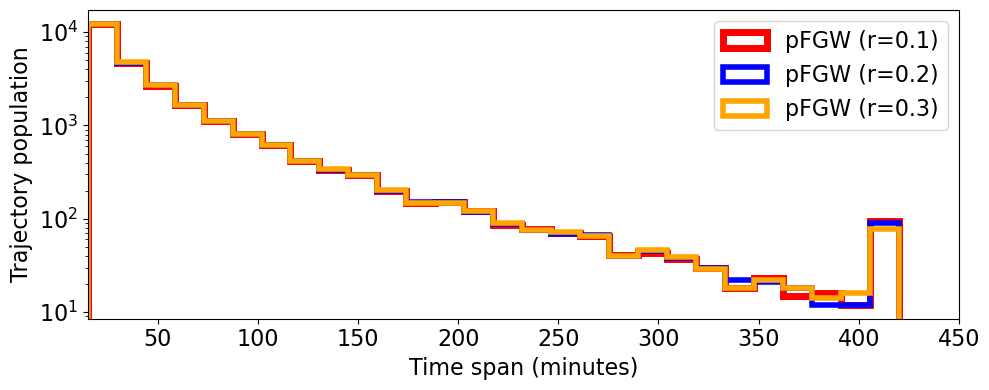

In [27]:
# Plot 1
font = {
    "family": "sans-serif",
    "weight": "normal",
    "size": 16
}

smallfont = {
    "family": "sans-serif",
    "weight": "normal",
    "size": 16
}

plt.figure(figsize=(10, 4))

labels_technique = {("pFGW-system", 0.1): "pFGW (r=0.1)", ("pFGW-system", 0.2): "pFGW (r=0.2)", ("pFGW-system", 0.3): "pFGW (r=0.3)"}
colors_technique = {("pFGW-system", 0.1): "red", ("pFGW-system", 0.2): "blue", ("pFGW-system", 0.3): "orange"}
linewidths_technique = {("pFGW-system", 0.1): 5, ("pFGW-system", 0.2): 4, ("pFGW-system", 0.3): 4}

for technique, r_value in techniques:
    all_durations = []
    for iDate in range(nDates):
        tmp_duration = track_information[(technique, r_value)][iDate][4]
        all_durations.extend(tmp_duration)
    durations = np.asarray(all_durations)
    
    print("Technique:", (technique, r_value))
    print(np.min(durations), np.max(durations))
    print("# trajactories of {}:".format(str((technique, r_value))), len(durations))
    print("# short trajactories of {}:".format(str((technique, r_value))), len(np.where(durations < 2)[0]))
    print("# cloud systems/objects of {}:".format(str((technique, r_value))), np.sum(durations))

for technique in techniques:
    all_durations = []
    for iDate in range(nDates):
        tmp_duration = track_information[technique][iDate][4]
        all_durations.extend(tmp_duration)
    durations = np.asarray(all_durations) * gap_size
    
    plt.hist(durations, bins=28, histtype="step", label=labels_technique[technique], 
             color=colors_technique[technique], linewidth=linewidths_technique[technique])

plt.yscale("log")
plt.xlabel("Time span (minutes)", font=font)
plt.ylabel("Trajectory population", font=font)

plt.xlim([15, 450])
plt.xticks(font=font)
plt.yticks(font=font)

plt.legend(prop=font)

plt.tight_layout()

plt.show()

### Plot 4. Bar plot for the evaluation statistics

* the median of trajectory durations 

* the mean of standard deviation of trajectory properties on tracks with duration > median
  - property 1. mean of cloud COD
  - property 2. standard deviation of cloud COD
  
* the root-mean-square error (RMSE) for the centroid locations of cloud systems on trajectories with duration > median

In [9]:
# statistical evaluation
labels = techniques
# labels = ["pFGW"] 

In [10]:
font = {
    "family": "sans-serif",
    "weight": "normal",
    "size": 32
}

smallfont = {
    "family": "sans-serif",
    "weight": "normal",
    "size": 24
}

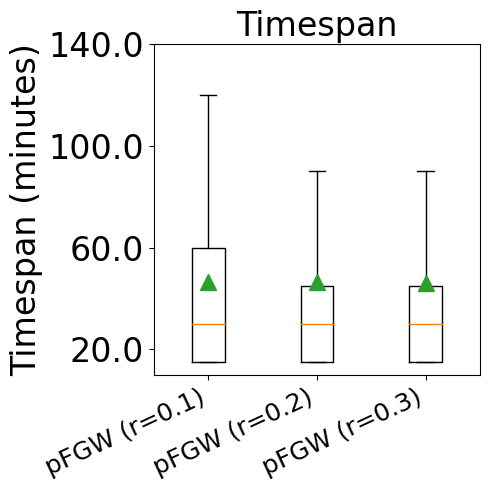

In [11]:
# Plot 4.1: median of trajectory durations
timespan_list = []

tinyfont = {
    "family": "sans-serif",
    "weight": "normal",
    "size": 18
}

for label in labels:
    all_durations = []
    for iDate in range(nDates):
        tmp_duration = track_information[label][iDate][4]
        all_durations.extend(tmp_duration)
    durations = np.asarray(all_durations) * gap_size
    # durations = np.asarray(track_information[label][4]) * gap_size
    timespan_list.append(durations)
    
plt.figure(figsize=(5, 5))
# plt.subplot(121)
# plt.violinplot(timespan_list, showmeans=False, showmedians=False)
# plt.xticks(range(1, len(labels)+1), labels, font=smallfont)
# plt.yticks(font=smallfont)
# # plt.title("West of Africa")
# # plt.xlabel("Strategy")
# plt.ylabel("Time span (minutes)", font=smallfont)

# plt.subplot(122)
plt.boxplot(timespan_list, showmeans=True, showfliers=False, meanprops={"markersize": 12})
plt.xticks(range(1, len(labels)+1), [labels_technique[each] for each in labels], font=tinyfont, rotation=25, ha='right')

yticks_pos, yticks_labels = plt.yticks(font=smallfont)
yticks_pos = yticks_pos[1::2]
plt.yticks(yticks_pos, yticks_pos, font=smallfont)

plt.title("Timespan", font=smallfont)
# plt.title("West of Africa")
# plt.xlabel("Strategy")
plt.ylabel("Timespan (minutes)", font=smallfont)
plt.tight_layout()
plt.show()


medians = {labels[i]: np.median(timespan_list[i]) / gap_size for i in range(len(labels))}
# plt.subplot(122)
# plt.bar(labels, medians)
# plt.show()

In [12]:
# Plot 4.2: the mean STD of cloud system/object property

def get_trajectory_properties(clustered_sfs, cloud_id_mapping, value_list, median, measure="mean", debug=False):
    std_track_properties = []
    track_ids = np.unique(list(cloud_id_mapping.values()))
    track_instances = {}
    for key in cloud_id_mapping:
        time_step, seg_id = key
        val = cloud_id_mapping[key]
        if val not in track_instances:
            track_instances[val] = [(time_step, seg_id)]
        else:
            track_instances[val].append((time_step, seg_id))
    
    for track_id in track_instances:
        regions = track_instances[track_id]
        regions.sort()
        
        if len(regions) <= median:
            continue
        
        track_property = []
        for time_step, seg_id in regions:
            segmentation = clustered_sfs[time_step]
            values = value_list[time_step]
            assert segmentation.shape == values.shape
            
            seg_values = values[segmentation == seg_id]
            if len(seg_values) == 0:
                print(seg_id, np.unique(segmentation))
            if measure == "mean":
                prop = np.mean(seg_values)
            elif measure == "std":
                prop = np.std(seg_values)
            else:
                raise NotImplementedError
            track_property.append(prop)
        
        std_track_property = np.std(track_property)
        std_track_properties.append(std_track_property)
    
    return track_instances, std_track_properties

In [13]:
import readMergeTree as rmt
# Additional step: load scalar fields
dataset_base = "CPPin20230801_0percent"

region_lists = []
value_lists = []

for date in dates:
    dataset = dataset_base.replace("20230801", date)
    dataset_path = os.path.join("data", dataset)
    
    region_list = []
    value_list = []
    for froot, di, files in os.walk(dataset_path):
        def key(s):
            try:
                int(s)
                return int(s)
            except ValueError:
                return len(files) + 1

        def isSegmentation(s: str):
            return "segmentation" in s

        def endsWithTxt(s: str):
            return s.endswith("txt")

        def endsWithNpy(s: str):
            return s.endswith("npy")

        txt_files = list(filter(endsWithTxt, files))
        txt_files.sort(key=lambda x: key(x.split(".")[0].split("_")[-1]))

        for file in txt_files:
            regions, values = rmt.get_regions(os.path.join(dataset_path, file))
            region_list.extend(regions)
            value_list.extend(values)

    assert (len(region_list) == len(value_list))
    
    region_lists.append(region_list)
    value_lists.append(value_list)

In [14]:
for each in medians:
    if medians[each] < 2:
        medians[each] = 2.0

print(medians)

{('pFGW-system', 0.1): 2.0, ('pFGW-system', 0.2): 2.0, ('pFGW-system', 0.3): 2.0}


In [15]:
# Step 1: we collect the trajectory information
measure = "mean"
track_instances_technique = {}
std_track_properties_technique = {}
for technique in techniques:
    for iDate in range(nDates):
        print("technique, date:", technique, dates[iDate])
        clustered_sfs, centroids, mapping_scores, cloud_id_mapping, durations = track_information[technique][iDate][:5]

        # value_list has the original scalar field
        value_list = value_lists[iDate]
        print(len(value_list), len(clustered_sfs))
        assert len(value_list) == len(clustered_sfs)
        track_instances, std_track_properties = get_trajectory_properties(clustered_sfs, cloud_id_mapping, value_list, medians[technique], measure, debug=technique=="tobac")
        track_instances_technique[(technique, iDate)] = track_instances
        std_track_properties_technique[(technique, iDate)] = std_track_properties

technique, date: ('pFGW-system', 0.1) 20230801
28 28
technique, date: ('pFGW-system', 0.1) 20230802
28 28
technique, date: ('pFGW-system', 0.1) 20230803
28 28
technique, date: ('pFGW-system', 0.1) 20230804
28 28
technique, date: ('pFGW-system', 0.1) 20230805
28 28
technique, date: ('pFGW-system', 0.1) 20230806
28 28
technique, date: ('pFGW-system', 0.1) 20230807
28 28
technique, date: ('pFGW-system', 0.1) 20230808
28 28
technique, date: ('pFGW-system', 0.2) 20230801
28 28
technique, date: ('pFGW-system', 0.2) 20230802
28 28
technique, date: ('pFGW-system', 0.2) 20230803
28 28
technique, date: ('pFGW-system', 0.2) 20230804
28 28
technique, date: ('pFGW-system', 0.2) 20230805
28 28
technique, date: ('pFGW-system', 0.2) 20230806
28 28
technique, date: ('pFGW-system', 0.2) 20230807
28 28
technique, date: ('pFGW-system', 0.2) 20230808
28 28
technique, date: ('pFGW-system', 0.3) 20230801
28 28
technique, date: ('pFGW-system', 0.3) 20230802
28 28
technique, date: ('pFGW-system', 0.3) 20230803

In [16]:
# print(list(std_track_properties_technique.keys()))

In [17]:
# plt.figure(figsize=(3, 4))

# mean_std_track_trajectories_list = []# np.mean(std_track_properties_technique[(labels[i], j)]) for i in range(len(labels)) for j in range(nDates)]
# for label in labels:
#     std_track_properties = []
#     for iDate in range(nDates):
#         std_track_properties.extend(std_track_properties_technique[(label, iDate)])
#     print(std_track_properties)
#     mean_std_track_trajectories_list.append(np.asarray(std_track_properties))

# plt.bar(labels, mean_std_track_trajectories_list)
# # plt.title("West of Africa")
# plt.xlabel("Strategy")
# plt.ylabel("Mean of STD of COD{}".format(measure[0]))

# trajectories: 9182
# trajectories: 9184
# trajectories: 9188
mean: 0.7103720574008754
median: 0.535485543548885
mean: 0.7092206825231394
median: 0.5334532406124144
mean: 0.7067422996548939
median: 0.5313026457024825


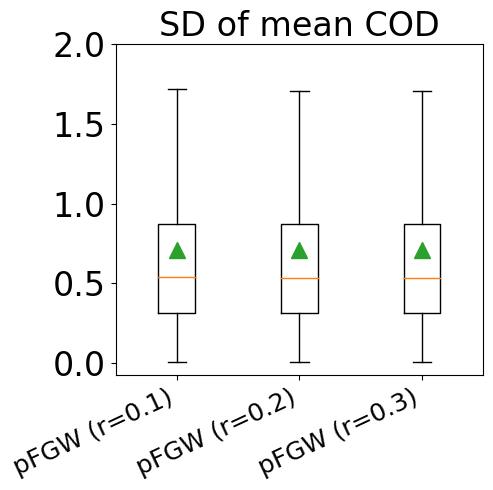

In [24]:
smallfont = {
    "family": "sans-serif",
    "weight": "normal",
    "size": 24
}

tinyfont = {
    "family": "sans-serif",
    "weight": "normal",
    "size": 18
}


std_track_trajectories_list = []
for label in labels:
    std_track_properties = []
    for iDate in range(nDates):
        std_track_properties.extend(std_track_properties_technique[(label, iDate)])
    print("# trajectories:", len(std_track_properties))
    std_track_trajectories_list.append(np.asarray(std_track_properties))
    
plt.figure(figsize=(5, 5))
# plt.subplot(121)
# plt.violinplot(std_track_trajectories_list, showmeans=False, showmedians=False)
# plt.xticks(range(1, len(labels)+1), labels, font=smallfont)
# plt.yticks(font=smallfont)
# # plt.title("West of Africa")
# # plt.xlabel("Strategy")
# plt.ylabel("Std Dev. of COD{}".format(measure[0]), font=smallfont)

# plt.subplot(122)
plt.boxplot(std_track_trajectories_list, showmeans=True, showfliers=False, meanprops={"markersize": 12})
plt.xticks(range(1, len(labels)+1), [labels_technique[each] for each in labels], font=tinyfont, rotation=25, ha='right')

yticks_pos, yticks_labels = plt.yticks(font=smallfont)
yticks_pos = yticks_pos[1::2]
plt.yticks(yticks_pos, yticks_pos, font=smallfont)

plt.title("SD of {} COD".format(measure), font=smallfont)
plt.tight_layout()

# plt.title("West of Africa")
# plt.xlabel("Strategy")
# plt.ylabel("Std Dev. of COD{}".format(measure[0]), font=smallfont)

for ss in std_track_trajectories_list:
    print("mean:", np.mean(ss))
    print("median:", np.median(ss))

In [19]:
def get_trajectory_line_fit(track_instances, centroids, median):
    root_mses = []
    
    for track_id in track_instances:
        regions = track_instances[track_id]
        regions.sort()
        
        if len(regions) <= median:
            continue
        
        xs = []
        ys = []
        for time_step, seg_id in regions:
            segmentation = clustered_sfs[time_step]
            values = value_list[time_step]
            assert segmentation.shape == values.shape
            
            xs.append(time_step)
            ys.append(centroids[time_step][seg_id])
        
        p, residuals, rank, singular_values, rcond = np.polyfit(xs, ys, 1, full=True)
        root_mses.append(np.sum(np.sqrt(residuals)))
        
    return root_mses

In [20]:
std_track_linefit_technique = {}
for technique in techniques:
    for iDate in range(nDates):
        date = dates[iDate]
        print("technique:", technique)
        clustered_sfs, centroids, mapping_scores, cloud_id_mapping, durations = track_information[technique][iDate][:5]
        track_instances = track_instances_technique[(technique, iDate)]

        value_list = value_lists[iDate]
        # value_list has the original scalar field
        assert len(value_list) == len(clustered_sfs)
        root_mses = get_trajectory_line_fit(track_instances, centroids, medians[technique])
        std_track_linefit_technique[(technique, iDate)] = root_mses

technique: ('pFGW-system', 0.1)
technique: ('pFGW-system', 0.1)
technique: ('pFGW-system', 0.1)
technique: ('pFGW-system', 0.1)
technique: ('pFGW-system', 0.1)
technique: ('pFGW-system', 0.1)
technique: ('pFGW-system', 0.1)
technique: ('pFGW-system', 0.1)
technique: ('pFGW-system', 0.2)
technique: ('pFGW-system', 0.2)
technique: ('pFGW-system', 0.2)
technique: ('pFGW-system', 0.2)
technique: ('pFGW-system', 0.2)
technique: ('pFGW-system', 0.2)
technique: ('pFGW-system', 0.2)
technique: ('pFGW-system', 0.2)
technique: ('pFGW-system', 0.3)
technique: ('pFGW-system', 0.3)
technique: ('pFGW-system', 0.3)
technique: ('pFGW-system', 0.3)
technique: ('pFGW-system', 0.3)
technique: ('pFGW-system', 0.3)
technique: ('pFGW-system', 0.3)
technique: ('pFGW-system', 0.3)


mean: 5.892816259214663
median: 2.4595070373792476
mean: 5.696886945406104
median: 2.4497309173869297
mean: 5.556596531439242
median: 2.436083335444925


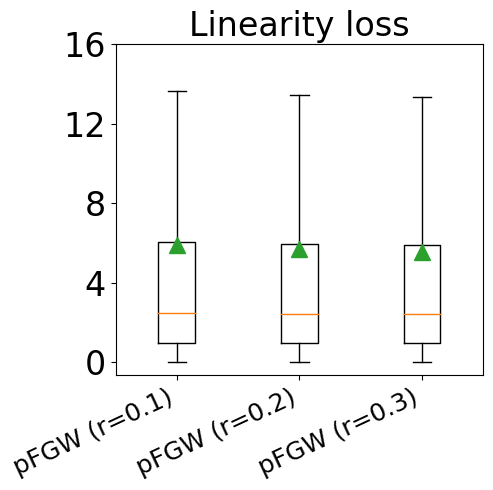

In [25]:
std_track_linefit_list = []
for label in labels:
    std_track_linefits = []
    for iDate in range(nDates):
        std_track_linefits.extend(std_track_linefit_technique[(label, iDate)])
    std_track_linefit_list.append(np.asarray(std_track_linefits))

plt.figure(figsize=(5, 5))

# plt.subplot(121)
# plt.violinplot(std_track_linefit_list, showmeans=False, showmedians=False)
# plt.xticks(range(1, len(labels)+1), labels, font=smallfont)
# plt.yticks(font=smallfont)
# # plt.title("West of Africa")
# # plt.xlabel("Strategy")
# plt.ylabel("Linearity error", font=smallfont)

# plt.subplot(122)

plt.boxplot(std_track_linefit_list, labels=labels, showmeans=True, showfliers=False, meanprops={"markersize": 12})
plt.xticks(range(1, len(labels)+1), [labels_technique[each] for each in labels], font=tinyfont, rotation=25, ha='right')

yticks_pos, yticks_labels = plt.yticks(font=smallfont)
yticks_pos = yticks_pos[1::2]
plt.yticks(yticks_pos, [str(int(each)) for each in yticks_pos], font=smallfont)

plt.title("Linearity loss", font=smallfont)
plt.tight_layout()
# # plt.xlabel("Strategy")
# plt.ylabel("Linearity error", font=smallfont)

for ss in std_track_linefit_list:
    print("mean:", np.mean(ss))
    print("median:", np.median(ss))

In [22]:
def l2_dist(a, b):
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

def get_trajectory_avg_speed(track_instances, centroids, median):
    speeds_record = {}
    
    for track_id in track_instances:
        regions = track_instances[track_id]
        regions.sort()
        
        if len(regions) <= median:
            continue
        
        xs = []
        ys = []
        for time_step, seg_id in regions:
            segmentation = clustered_sfs[time_step]
            values = value_list[time_step]
            assert segmentation.shape == values.shape
            
            xs.append(time_step)
            ys.append(centroids[time_step][seg_id])
        
        for i in range(len(xs) - 1):
            x, y = xs[i], ys[i]
            next_x, next_y = xs[i+1], ys[i+1]
            if x not in speeds_record:
                speeds_record[x] = [l2_dist(y, next_y)]
            else:
                speeds_record[x].append(l2_dist(y, next_y))
#         p, residuals, rank, singular_values, rcond = np.polyfit(xs, ys, 1, full=True)
#         root_mses.append(np.sum(np.sqrt(residuals)))

    speeds = {}
    for each_x in speeds_record:
        speeds[each_x] = np.mean(speeds_record[each_x])
        
    return speeds

technique: ('pFGW-system', 0.1)
technique: ('pFGW-system', 0.2)
technique: ('pFGW-system', 0.3)


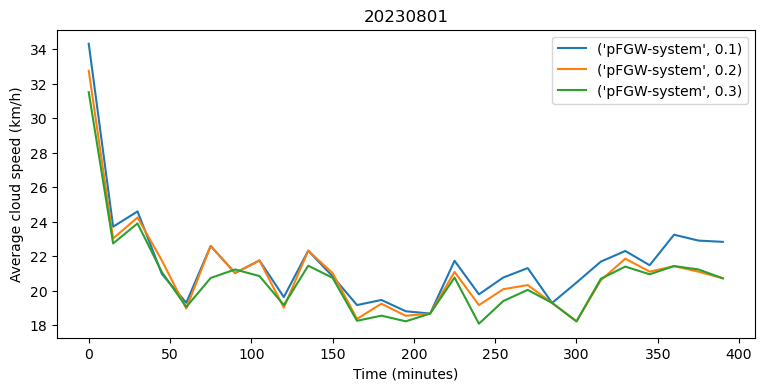

technique: ('pFGW-system', 0.1)
technique: ('pFGW-system', 0.2)
technique: ('pFGW-system', 0.3)


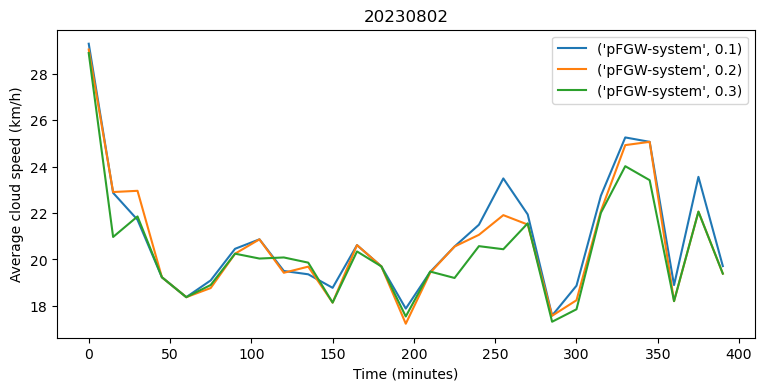

technique: ('pFGW-system', 0.1)
technique: ('pFGW-system', 0.2)
technique: ('pFGW-system', 0.3)


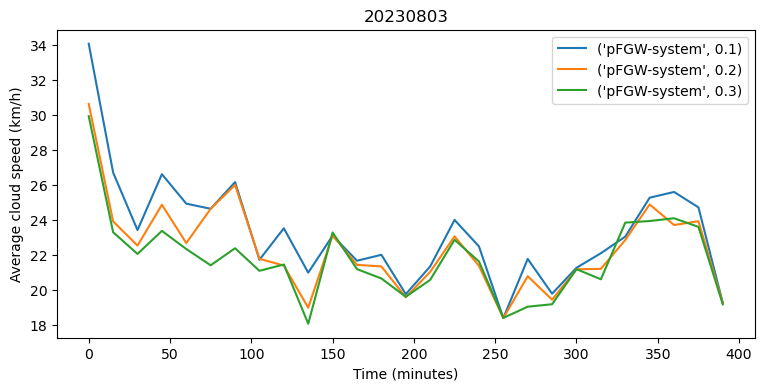

technique: ('pFGW-system', 0.1)
technique: ('pFGW-system', 0.2)
technique: ('pFGW-system', 0.3)


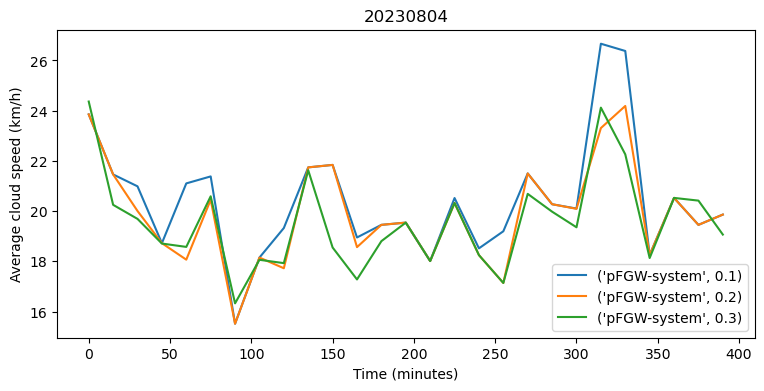

technique: ('pFGW-system', 0.1)
technique: ('pFGW-system', 0.2)
technique: ('pFGW-system', 0.3)


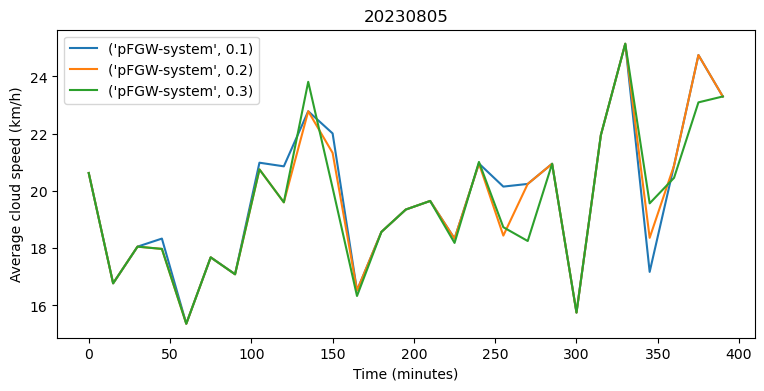

technique: ('pFGW-system', 0.1)
technique: ('pFGW-system', 0.2)
technique: ('pFGW-system', 0.3)


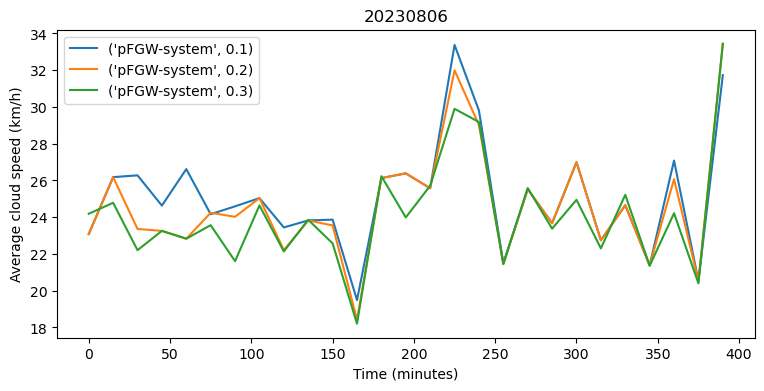

technique: ('pFGW-system', 0.1)
technique: ('pFGW-system', 0.2)
technique: ('pFGW-system', 0.3)


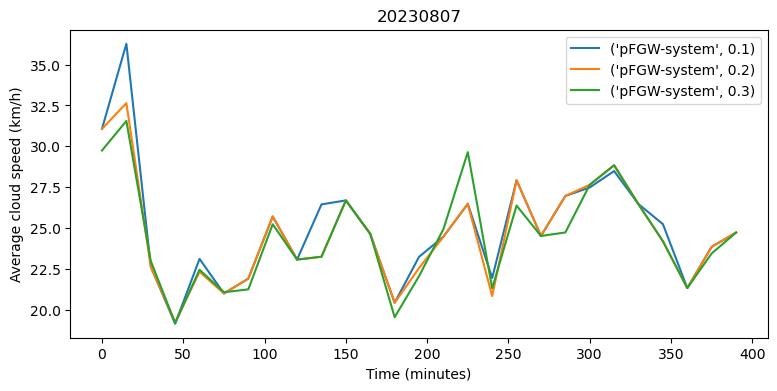

technique: ('pFGW-system', 0.1)
technique: ('pFGW-system', 0.2)
technique: ('pFGW-system', 0.3)


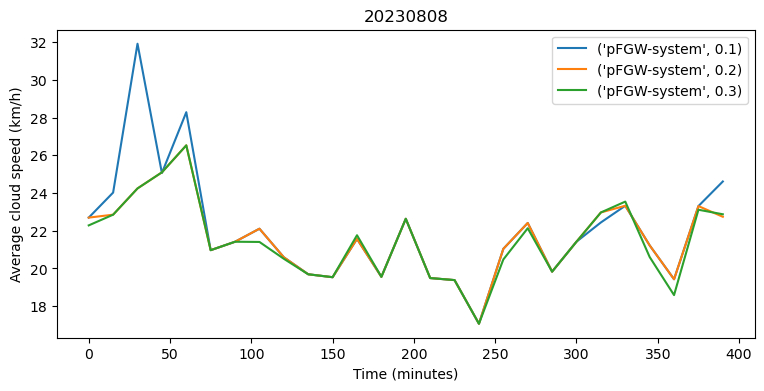

In [23]:
for iDate in range(nDates):
    plt.figure(figsize=(9, 4))
    for label in labels:
        date = dates[iDate]
        print("technique:", label)
        clustered_sfs, centroids, mapping_scores, cloud_id_mapping, durations = track_information[label][iDate]
        track_instances = track_instances_technique[(label, iDate)]

        value_list = value_lists[iDate]
        # value_list has the original scalar field
        assert len(value_list) == len(clustered_sfs)
        speeds = get_trajectory_avg_speed(track_instances, centroids, medians[label])
        
        xs = [each * gap_size for each in speeds.keys()]
        ys = [each * 2 * 4 for each in speeds.values()]
        
        plt.plot(xs, ys, label=label)
        
    plt.xlabel("Time (minutes)")
    plt.ylabel("Average cloud speed (km/h)")
    plt.title(date)
    plt.legend()
    plt.show()

### Section 3. Appendix plots for parameter justification

In [31]:
# # plot: max matched distance
# dist_table_path = "./binary-parameter-tuning/CPPin20230801_0percent"

# filename = "m_tuning_stats_alpha_0.2.csv"

# import pandas as pd
# dist_table = pd.read_csv(pjoin(dist_table_path, filename)).to_dict()

In [32]:
# dist_ms = dist_table['m']
# dist_mmds = dist_table["max_matched_distance"]

# def parse_list_str(st):
#     st = st.replace("[", "").replace("]", "").strip()
#     items = st.split(",")
#     lst = []
#     for item in items:
#         lst.append(float(item))
#     return lst

# lst_ms = []
# lst_mmds = []
# for key in dist_ms:
#     tmp_ms = parse_list_str(dist_ms[key])
#     tmp_mmds = parse_list_str(dist_mmds[key])
#     combined = list(zip(tmp_ms, tmp_mmds))
#     combined.sort()
#     ms = [i for i, j in combined]
#     mmds = [j for i, j in combined]
#     lst_ms.append(ms)
#     lst_mmds.append(mmds)

In [33]:
# plt.figure(figsize=(16, 8))
# for i in range(len(lst_ms)):
#     ms = lst_ms[i]
#     mmds = lst_mmds[i]
    
#     plt.plot(ms, mmds, label=str(i))
# plt.show()